## Seconda Parte Esercizi NN

aggiungiamo delle funzioni per semplificare il tutto e ridurre la mole di codice ripetuto.

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def pol_3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d 
def surface(x, y):
    return np.sin(x*x + y*y)

def NNmia(name):
    NN = tf.keras.Sequential()
    if name == 'pol':
        NN.add(Dense(30, input_shape=(1,), activation = 'tanh'))
        NN.add(Dense(1))
    elif name == 'surface':
        NN.add(Dense(40, input_shape=(2,), activation = 'selu'))
        NN.add(Dense(1))
   
    return NN

#prima generiamo i dati relativi ai due problemi
def dati_artificiali(name, interval):
    if name == 'pol':
        Ntraining = 1000
        Nvalidation = 100
        train = np.random.uniform(-interval, interval, Ntraining) 
        valid = np.random.uniform(-interval, interval, Nvalidation)  
        valid.sort()
        return train, valid, pol_3(train, 3, -2, -3, 4), pol_3(valid, 3, -2, -3, 4)
    elif name == 'surface':
        Ntraining = 8000
        Nvalidation = 400
        #x e y  e poi li uniamo, a keras piace così
        train1 = np.random.uniform(-interval, interval, Ntraining) 
        train2 = np.random.uniform(-interval, interval, Ntraining) 
        valid1 = np.random.uniform(-interval, interval, Nvalidation)  
        valid2 = np.random.uniform(-interval, interval, Nvalidation)  
        train = np.dstack((train1, train2)).reshape(Ntraining,2)
        valid = np.dstack((valid1, valid2)).reshape(Nvalidation,2) 
        return train, valid, train1,train2,valid1,valid2, surface(train1, train2), surface(valid1, valid2)

### Fit di $y = 3x^3 - 2x^2 - 3x +4$ in $x \in [-1, 1]$

In [24]:
#genero la mia rete, stampo il sommario e la traino
esercizio = 'pol'
x_train, x_valid, y_train, y_valid = dati_artificiali(esercizio, 1)
model = NNmia(esercizio)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

btsize = 50
numeroepoche = 400
history = model.fit(x = x_train, y=y_train, 
          batch_size=btsize, epochs=numeroepoche,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), 
                   verbose = 0)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


Accuratezza per training
Test loss: 0.010062871710397303

 Accuratezza sui dati di validation
Test loss: 0.011216710321605206


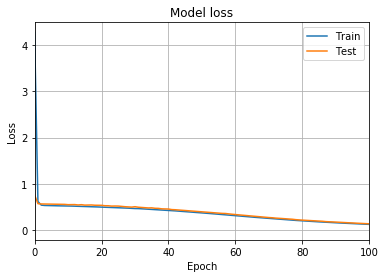

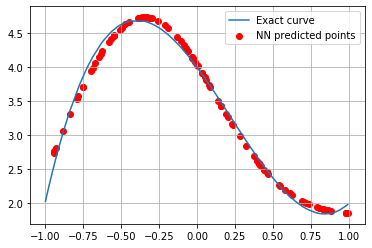

In [25]:
# evaluate model
score = model.evaluate(x_train, y_train, batch_size=50, verbose=0)

# print performance
print("Accuratezza per training")
print('Test loss:', score[0])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_valid, batch_size=50, verbose=0)

# print performance
print("\n Accuratezza sui dati di validation")
print('Test loss:', score[0])

# look into training history
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlim(0, 100)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Show actual predictions of the network
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

# Adjust model output shape to match plot-requirings
dim = len(y_predicted)
y_predicted = y_predicted.reshape(dim,)

# PLot 2D

fig = plt.figure()

plt.scatter(x_predicted, y_predicted,color='r', label = 'NN predicted points')
plt.plot(x_valid, y_valid, label = 'Exact curve')
plt.legend()
plt.grid(True)
plt.show()

$z = sin(x^2 + y^2)$


In [19]:
esercizio = 'surface'
x_train, x_valid,  x1_train, x2_train, x1_valid, x2_valid, y_train, y_valid = dati_artificiali(esercizio, 1.5)
# compose the NN model
model = NNmia(esercizio)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
btsize = 100
numeroepoche = 400
    
history = model.fit(x = x_train, y=y_train, 
          batch_size=btsize, epochs=numeroepoche,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
        verbose = 0)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 41        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


precisione training
Test loss: 0.008246996230445803
precisione validation
Test loss: 0.008030800730921328


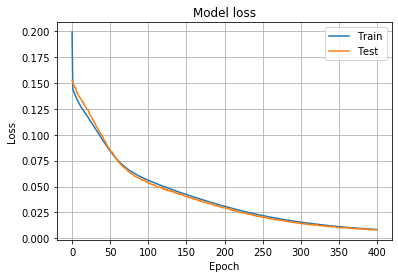

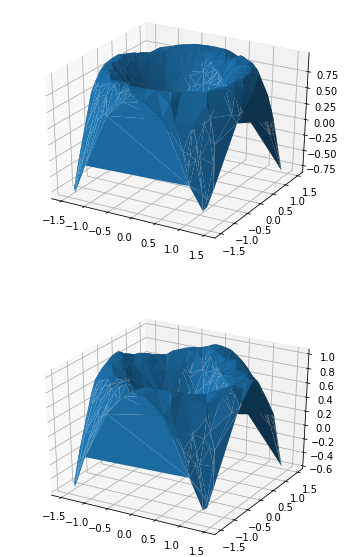

In [23]:
score = model.evaluate(x_train, y_train, batch_size=50, verbose=0)
print("precisione training")
print('Test loss:', score[0])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_valid, batch_size=50, verbose=0)

print("precisione validation")
print('Test loss:', score[0])

# look into training history
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

y_predicted = model.predict(x_valid)

dim = len(y_predicted)
y_predicted = y_predicted.reshape(dim,)

fig = plt.figure(figsize = (6, 10))
ax = fig.add_subplot(211, projection='3d')
ax.plot_trisurf(x1_valid, x2_valid, y_valid)
ax = fig.add_subplot(212, projection='3d')
ax.plot_trisurf(x1_valid, x2_valid, y_predicted)
